<a href="https://colab.research.google.com/github/soulsharp/Autoencoders_explained/blob/main/Exploring_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# import all the dependencies

import torch
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# from PIL import Image

In [7]:
print(f"torch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"numpy version: {np.__version__}")

torch version: 2.1.0+cu121
torchvision version: 0.16.0+cu121
matplotlib version: 3.7.1
numpy version: 1.23.5


In [ ]:
# transform the image
transform = transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,))
                              ])

# create the train and test datasets
train_data = datasets.MNIST(root='./train', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./test', train=False, download=True, transform=transform)
len(train_data)

100%|██████████| 9912422/9912422 [00:00<00:00, 140896405.19it/s]


Extracting ./train/MNIST/raw/train-images-idx3-ubyte.gz to ./train/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 66375722.64it/s]


Extracting ./train/MNIST/raw/train-labels-idx1-ubyte.gz to ./train/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 38367690.95it/s]


Extracting ./train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./train/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11265836.05it/s]


Extracting ./train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./train/MNIST/raw



100%|██████████| 9912422/9912422 [00:00<00:00, 128372792.67it/s]

Extracting ./test/MNIST/raw/train-images-idx3-ubyte.gz to ./test/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 75473952.54it/s]


Extracting ./test/MNIST/raw/train-labels-idx1-ubyte.gz to ./test/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 41709233.33it/s]


Extracting ./test/MNIST/raw/t10k-images-idx3-ubyte.gz to ./test/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 9911825.58it/s]

Extracting ./test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./test/MNIST/raw



60000

The shape before squeezing (1, 28, 28)


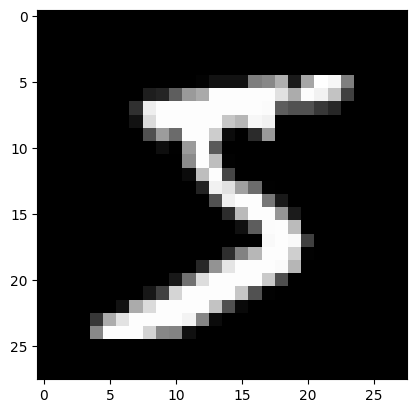

The shape after squeezing (28, 28)


In [ ]:
# each sample data can be unpacked to image, image_label
plt.figure()
x, y = train_data[0]

# convert tensor to numpy for plt.imshow
x = x.numpy()
print(f"The shape before squeezing {x.shape}")

#squeeze removes dimensions with size 1
x = np.squeeze(x)
plt.imshow(x, cmap='gray')
plt.show()
print(f"The shape after squeezing {x.shape}")

60000

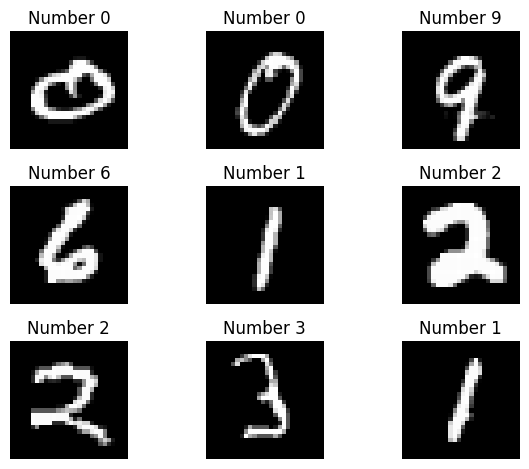

In [ ]:
# Takes in num of cols and rows of MNIST data samples the user wants displayed
# Displays a grid of images sampled randomly from the MNIST dataset

def print_MNIST_grid(num_rows:int, num_cols:int):
  fig, axes = plt.subplots(num_rows, num_cols)
  sample_indices = np.random.choice(np.arange(0, len(train_data)), num_rows*num_cols, replace=False)
  for i in range(num_rows):
    for j in range(num_cols):
      axes[i, j].imshow(np.squeeze(train_data[sample_indices[num_cols*i+j]][0]), cmap='gray')
      axes[i, j].set_title(f"Number {train_data[sample_indices[num_cols*i+j]][1]}")
      axes[i, j].axis("off")

  plt.tight_layout()

print_MNIST_grid(3, 3)
len(train_data)

In [ ]:
# loads the train dataset into batches

# np.random.seed(232321)
# shuffled_indices = np.random.choice(np.arange(0, len(train_data)), size=len(train_data), replace=False)
# print(len(shuffled_indices))
# torch.manual_seed(2323)
# split_index = int(0.2*len(train_data))
# val_data = train_data[:split_index]
# train_data = train_data[split_index:]

# splits the train dataset into train and validation datasets

train_data, val_data = random_split(train_data, [50000, 10000])
len(train_data)

50000

torch.Size([128, 1, 28, 28])
torch.Size([3, 242, 482])


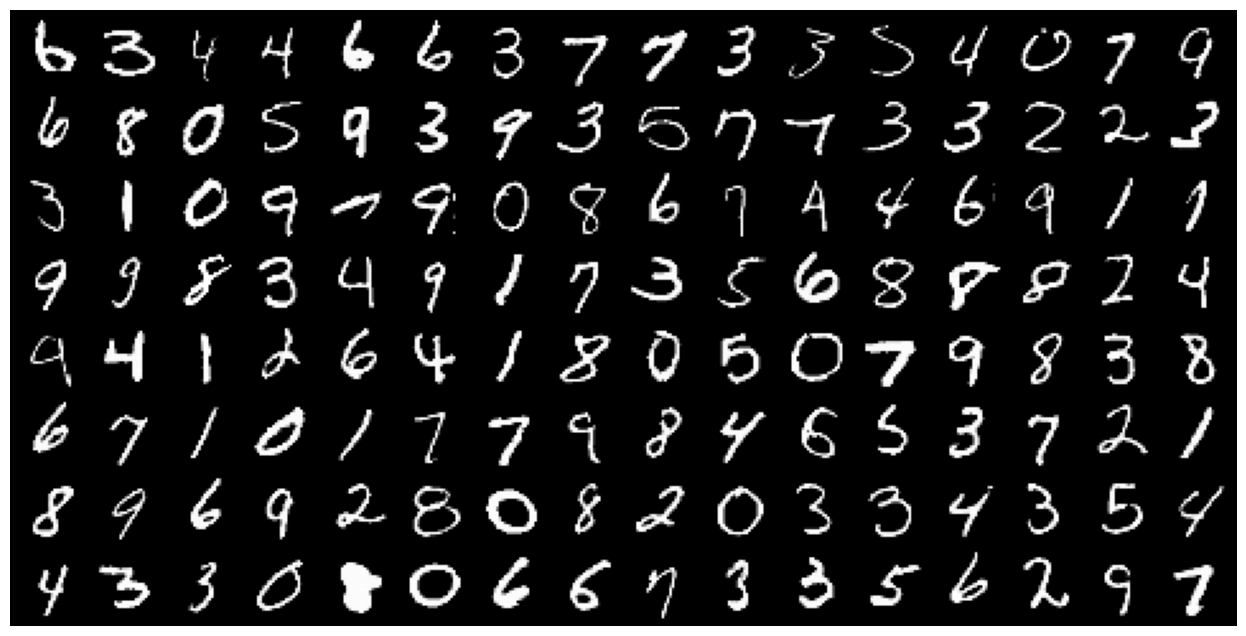

In [ ]:
# creating mini batches of size batch_size to optimize training
batch_size = 128
train_dl = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_data, batch_size=batch_size)

# visualizing the first batch created in the training dataset
for images, _ in train_dl:
  print(images.shape)
  plt.figure(figsize = (16, 8))
  plt.axis("off")
  plt.imshow(torchvision.utils.make_grid(images, 16).permute((1, 2, 0)))
  print(torchvision.utils.make_grid(images, 16).shape)
  break

In [ ]:
# First using a feed forward neural network as the classifier
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class MnistModel(nn.Module):
  def __init__(self, input_size:int, num_outputs:int):
    super().__init__()
    self.input_size = input_size
    self.num_outputs = num_outputs
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(self.input_size, 256)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(256, self.num_outputs)

  def forward(self, x):
    x = self.flatten(x)
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)

    return x

for images, labels in train_dl:
  model = MnistModel(28*28, 10)
  output = model(images)
  print(output)
  break

tensor([[ 0.1494, -0.1418,  0.1468,  ..., -0.1719,  0.0099, -0.2205],
        [ 0.1342, -0.0737,  0.2149,  ...,  0.0836, -0.1829, -0.1738],
        [-0.0092, -0.2651,  0.1981,  ..., -0.1529,  0.0680, -0.3122],
        ...,
        [ 0.1329, -0.4585,  0.0759,  ..., -0.1414,  0.0643, -0.3069],
        [ 0.0499, -0.2633,  0.1167,  ..., -0.0347,  0.1577, -0.2147],
        [ 0.1782, -0.4023,  0.1655,  ..., -0.0106, -0.2311, -0.1543]],
       grad_fn=<AddmmBackward0>)


In [ ]:
# demonstration of cross_entropy loss
loss_fn = F.cross_entropy

def compute_loss(loss_fn, logits, labels):
    return loss_fn(logits, labels)

for images, labels in train_dl:
    model = MnistModel(28*28, 10)
    output = model(images)
    loss = compute_loss(loss_fn, output, labels)
    print(loss)
    loss.backward()
    break

tensor(2.3544, grad_fn=<NllLossBackward0>)


In [ ]:
a = torch.tensor([[1, 3, 5], [2, 4, 5], [0, 0, 0]])
print(a.shape)
b = torch.tensor([[1, 2, 5], [3, 4, 6], [0, 0, 0]])
torch.sum(a==b, dim=1)
torch.max(a, dim=0)

torch.Size([3, 3])


torch.return_types.max(
values=tensor([2, 4, 5]),
indices=tensor([1, 1, 0]))

In [ ]:
def evaluate_accuracy(preds, labels):
    return torch.sum(preds == labels).item() / len(preds)

In [ ]:
def fit(num_of_epochs, lr, model, train_dl, val_dl, opt_func=optim.Adam):

  optimizer = opt_func(model.parameters(), lr)
  print(len(model.parmeters()))
  # sets model to training mode
  model.train()
  train_accuracy = 0.0

  # logs the metrics every epoch
  metrics = {"train_loss" : [], "train_accuracy" : [], "val_accuracy" : []}
  for epoch in range(num_of_epochs):
    train_loss = 0.0
    for images, labels in train_dl:
      outputs = model(images)
      loss = F.cross_entropy(outputs, labels)

      # calculates grad for all model params where torch.grad is enabled automatically --> autograd
      loss.backward()

      # uses the specified optimizer on every param mentioned in the opt_func to update their vals
      optimizer.step()

      # sets the grads associated with each param back to zero to prevent accumlation of grads
      optimizer.zero_grad()
      train_loss += loss
      train_accuracy += evaluate_accuracy(outputs.argmax(dim=1), labels)

    # calculates average training accuracy and training loss for one epoch
    train_accuracy /= len(train_dl)
    train_loss /= len(train_dl)
    metrics["train_loss"].append(train_loss)
    metrics["train_accuracy"].append(train_accuracy)

    model.eval()
    val_accuracy = 0.0

    with torch.no_grad():
      for images, labels in val_dl:
         val_accuracy += evaluate_accuracy(model(images).argmax(dim=1), labels)

    val_accuracy /= len(val_dl)
    metrics["val_accuracy"].append(val_accuracy)
    print(f"Epoch {epoch + 1}/{num_of_epochs}, Train Loss: {train_loss:.2f}, Train Accuracy: {train_accuracy:.2f}, Val Accuracy: {val_accuracy:.2f}")

  return metrics

In [ ]:
fit(3, 0.01, model, train_dl, val_dl)

Epoch 1/3, Train Loss: 0.50, Train Accuracy: 0.87, Val Accuracy: 0.93
Epoch 2/3, Train Loss: 0.21, Train Accuracy: 0.94, Val Accuracy: 0.93
Epoch 3/3, Train Loss: 0.18, Train Accuracy: 0.95, Val Accuracy: 0.95


{'train_loss': [tensor(0.4978, grad_fn=<DivBackward0>),
  tensor(0.2067, grad_fn=<DivBackward0>),
  tensor(0.1822, grad_fn=<DivBackward0>)],
 'train_accuracy': [0.8677789322250639,
  0.9401549652998084,
  0.9478568541312016],
 'val_accuracy': [0.9329509493670886, 0.9337420886075949, 0.9511471518987342]}

In [ ]:
class EncoderDecoder(nn.Module):
    def __init__(self, input_size):
        super(EncoderDecoder, self).__init__()
        self.input_size = input_size
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(self.input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, self.input_size)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        return x

In [ ]:
def fit_autoencoder(num_of_epochs, train_dl, model, lr, opt_func=optim.Adam):
    optimizer = opt_func(model.parameters(), lr=lr)
    history = []

    for epoch in range(num_of_epochs):
        model.train()
        train_loss = 0.0

        for images, _ in train_dl:
            outputs = model(images)
            loss = F.mse_loss(outputs, images.reshape(images.shape[0], -1))
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            train_loss += loss.item()

        history.append(train_loss / len(train_dl))
        print(f"Epoch {epoch + 1}/{num_of_epochs} : loss = {train_loss / len(train_dl)}")

    return history

model = EncoderDecoder(28 * 28)
fit_autoencoder(3, train_dl, model, 1e-3)

Epoch 1/3 : loss = 0.1370460625042391
Epoch 2/3 : loss = 0.062199246271720625
Epoch 3/3 : loss = 0.05000472095463892


[0.1370460625042391, 0.062199246271720625, 0.05000472095463892]

In [ ]:
sum(1 for _ in model.parameters())

8

In [ ]:
# validates the loss on the cross validation set
def validation_set_test(model, val_dl):
  model.eval()
  total_loss = 0.0

  with torch.no_grad():
    for images, labels in val_dl:
      outputs = model(images)
      loss = F.mse_loss(outputs, images.reshape(images.shape[0], -1))
      total_loss += loss.item()

  return total_loss/ len(val_dl), outputs, labels, images

Validation Loss: 0.046559855153289025


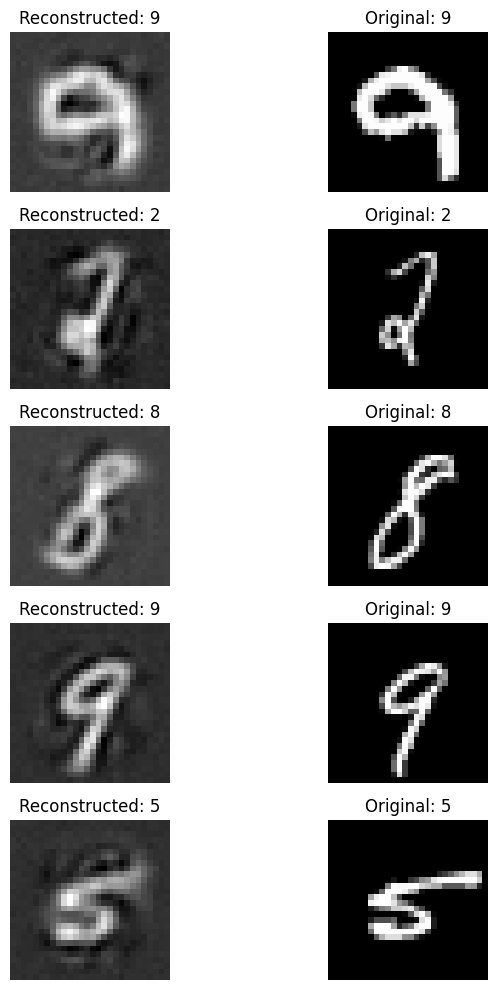

In [ ]:
loss, final_outputs, final_labels, final_images = validation_set_test(model, val_dl)
print("Validation Loss:", loss)

fig, axes = plt.subplots(5, 2, figsize=(8, 10))

# Visualizes the reconstructed images from the final batch and the corresponding original images
for i in range(5):
    axes[i, 0].imshow(final_outputs[i].reshape(28, 28).detach().numpy(), cmap="gray")
    axes[i, 0].set_title("Reconstructed: {}".format(final_labels[i].item()))
    axes[i, 0].axis("off")

    axes[i, 1].imshow(final_images[i].reshape(28, 28).detach().numpy(), cmap="gray")
    axes[i, 1].set_title("Original: {}".format(final_labels[i].item()))
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()

torch.Size([128, 1, 28, 28])


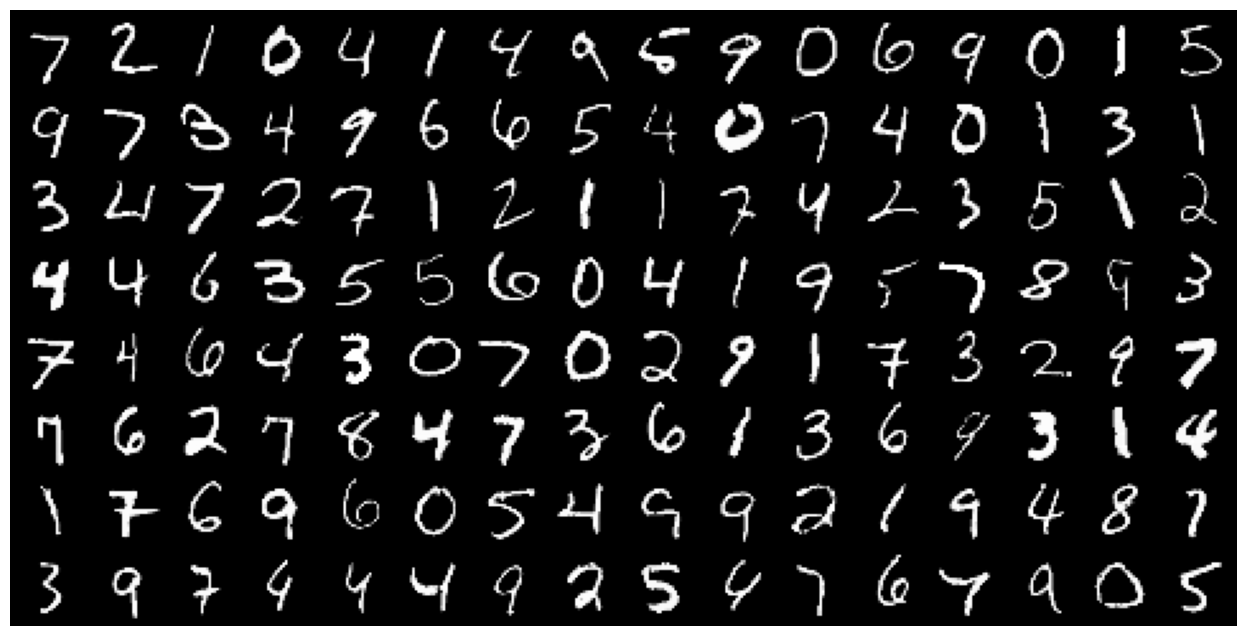

In [ ]:
# creates batches of test_data because the model is defined this way
batch_size = 128
test_dl = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# visualizes the first batch in the test set
for images, _ in test_dl:
  print(images.shape)
  plt.figure(figsize = (16, 8))
  plt.axis("off")
  plt.imshow(torchvision.utils.make_grid(images, 16).permute((1, 2, 0)))
  break

Test Loss: 0.045258702498070805


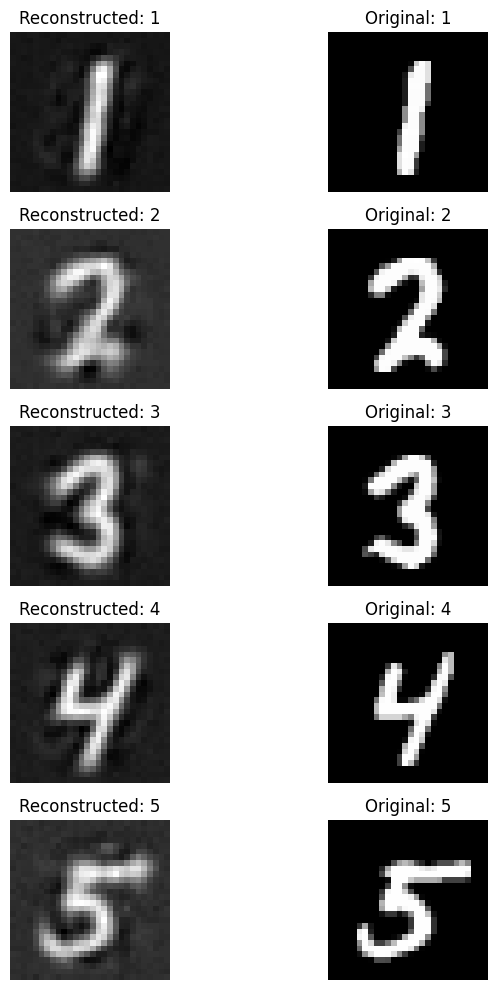

In [ ]:
# performs inference on the test data
# test_dl is passed to the validation_test_set since validation and test sets are evaluated the exact same way
loss, final_outputs, final_labels, final_images = validation_set_test(model, test_dl)
print("Test Loss:", loss)

fig, axes = plt.subplots(5, 2, figsize=(8, 10))

# Visualizes the reconstructed images from the final batch and the corresponding original images
for i in range(5):
    axes[i, 0].imshow(final_outputs[i].reshape(28, 28).detach().numpy(), cmap="gray")
    axes[i, 0].set_title("Reconstructed: {}".format(final_labels[i].item()))
    axes[i, 0].axis("off")

    axes[i, 1].imshow(final_images[i].reshape(28, 28).detach().numpy(), cmap="gray")
    axes[i, 1].set_title("Original: {}".format(final_labels[i].item()))
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()